In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# generate a list of column names
new_columns = list(range(-80, 19))

In [3]:
data= pd.read_csv(r"D:\ten organism\train data\anselmi bac vs. shuffled ten.csv")
downstream= pd.read_csv(r"D:\downstream control\train organism\train_downstream_anselmi.csv")

In [4]:
data.isnull().values.any()

False

In [5]:
data.head(5)

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,0.790,0.854,0.703,0.703,1.230,1.124,1.792,0.984,0.790,0.703,...,1.792,1.124,1.230,0.780,1.792,0.790,0.703,0.780,1.230,1
1,0.615,0.703,0.854,0.703,0.790,1.792,0.790,0.854,0.790,1.230,...,0.790,0.703,0.703,1.323,1.124,1.230,0.703,0.854,0.703,1
2,0.780,0.703,0.703,1.230,0.790,1.323,0.780,1.230,0.780,0.703,...,0.790,1.323,0.703,0.615,0.854,0.615,0.703,0.854,0.790,1
3,0.703,0.703,1.323,1.124,1.792,1.124,1.792,0.790,0.703,0.703,...,0.703,0.615,1.323,0.780,0.703,0.615,0.703,0.854,0.790,1
4,1.230,1.323,0.780,0.703,0.615,0.703,0.854,0.615,0.703,0.854,...,0.790,0.703,0.854,0.615,0.703,0.780,1.792,1.124,1.792,1


In [6]:
downstream.head(5)

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,0.780,1.323,0.615,0.854,1.230,0.790,0.854,0.703,0.703,0.615,...,0.780,1.792,0.984,1.124,0.984,0.984,1.230,0.703,0.780,1.323
1,0.984,1.230,0.780,1.230,0.703,0.780,0.984,1.230,0.703,1.323,...,0.790,1.792,0.984,1.124,1.792,0.790,0.854,0.615,1.323,1.124
2,0.790,0.984,1.230,0.703,0.780,1.230,1.323,0.790,0.703,1.323,...,0.703,0.703,1.323,0.790,0.780,1.792,0.780,0.703,0.790,1.230
3,1.323,0.790,1.230,0.703,0.854,0.703,0.703,0.790,1.323,0.703,...,1.124,1.792,0.780,0.790,1.792,0.780,0.703,0.703,0.615,0.703
4,0.703,0.703,0.780,1.230,1.323,1.124,1.792,0.780,1.230,0.780,...,0.780,1.230,0.780,0.790,1.230,0.854,0.790,1.230,0.854,0.615


### Preprocessing Promoter data

In [7]:
promoter_seq = data[data['label'] == 1]
promoter_seq.shape

(14669, 100)

In [8]:
promoter_no_label=promoter_seq.drop(columns=['label'])
promoter_no_label.columns=new_columns
promoter_no_label.shape

(14669, 99)

In [9]:
promoter_without_label=promoter_no_label
promoter_without_label.shape

(14669, 99)

In [10]:
promoter_without_label['label']=1

In [11]:
promoter= promoter_without_label
promoter['label']=promoter['label'].astype(int)
promoter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14669 entries, 0 to 14668
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -80     14669 non-null  float64
 1   -79     14669 non-null  float64
 2   -78     14669 non-null  float64
 3   -77     14669 non-null  float64
 4   -76     14669 non-null  float64
 5   -75     14669 non-null  float64
 6   -74     14669 non-null  float64
 7   -73     14669 non-null  float64
 8   -72     14669 non-null  float64
 9   -71     14669 non-null  float64
 10  -70     14669 non-null  float64
 11  -69     14669 non-null  float64
 12  -68     14669 non-null  float64
 13  -67     14669 non-null  float64
 14  -66     14669 non-null  float64
 15  -65     14669 non-null  float64
 16  -64     14669 non-null  float64
 17  -63     14669 non-null  float64
 18  -62     14669 non-null  float64
 19  -61     14669 non-null  float64
 20  -60     14669 non-null  float64
 21  -59     14669 non-null  float64
 2

### Preprocessing Downstream Data

In [12]:
downstream

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,0.780,1.323,0.615,0.854,1.230,0.790,0.854,0.703,0.703,0.615,...,0.780,1.792,0.984,1.124,0.984,0.984,1.230,0.703,0.780,1.323
1,0.984,1.230,0.780,1.230,0.703,0.780,0.984,1.230,0.703,1.323,...,0.790,1.792,0.984,1.124,1.792,0.790,0.854,0.615,1.323,1.124
2,0.790,0.984,1.230,0.703,0.780,1.230,1.323,0.790,0.703,1.323,...,0.703,0.703,1.323,0.790,0.780,1.792,0.780,0.703,0.790,1.230
3,1.323,0.790,1.230,0.703,0.854,0.703,0.703,0.790,1.323,0.703,...,1.124,1.792,0.780,0.790,1.792,0.780,0.703,0.703,0.615,0.703
4,0.703,0.703,0.780,1.230,1.323,1.124,1.792,0.780,1.230,0.780,...,0.780,1.230,0.780,0.790,1.230,0.854,0.790,1.230,0.854,0.615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,0.854,0.703,0.790,1.792,0.780,0.790,0.984,1.323,0.703,0.790,...,0.780,1.230,0.780,1.323,0.703,0.790,1.792,0.984,0.984,0.790
14665,1.230,0.703,0.780,1.323,1.230,0.790,1.323,0.984,0.790,0.780,...,0.854,0.703,0.615,1.323,0.780,1.230,0.984,0.780,0.615,1.323
14666,0.703,0.703,0.703,0.703,0.790,0.984,1.792,1.124,1.323,0.615,...,0.703,0.615,0.780,1.230,1.323,0.790,0.780,1.323,0.703,0.790
14667,1.124,1.230,0.703,0.854,0.790,0.984,1.230,0.703,0.780,1.230,...,0.615,0.854,0.703,0.703,0.703,0.703,0.615,1.323,0.790,1.323


In [13]:
downstream.columns= new_columns
downstream_no_label=downstream
downstream['label']= 0
downstream['label']= downstream['label'].astype(int)

In [14]:
downstream

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,0.780,1.323,0.615,0.854,1.230,0.790,0.854,0.703,0.703,0.615,...,1.792,0.984,1.124,0.984,0.984,1.230,0.703,0.780,1.323,0
1,0.984,1.230,0.780,1.230,0.703,0.780,0.984,1.230,0.703,1.323,...,1.792,0.984,1.124,1.792,0.790,0.854,0.615,1.323,1.124,0
2,0.790,0.984,1.230,0.703,0.780,1.230,1.323,0.790,0.703,1.323,...,0.703,1.323,0.790,0.780,1.792,0.780,0.703,0.790,1.230,0
3,1.323,0.790,1.230,0.703,0.854,0.703,0.703,0.790,1.323,0.703,...,1.792,0.780,0.790,1.792,0.780,0.703,0.703,0.615,0.703,0
4,0.703,0.703,0.780,1.230,1.323,1.124,1.792,0.780,1.230,0.780,...,1.230,0.780,0.790,1.230,0.854,0.790,1.230,0.854,0.615,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,0.854,0.703,0.790,1.792,0.780,0.790,0.984,1.323,0.703,0.790,...,1.230,0.780,1.323,0.703,0.790,1.792,0.984,0.984,0.790,0
14665,1.230,0.703,0.780,1.323,1.230,0.790,1.323,0.984,0.790,0.780,...,0.703,0.615,1.323,0.780,1.230,0.984,0.780,0.615,1.323,0
14666,0.703,0.703,0.703,0.703,0.790,0.984,1.792,1.124,1.323,0.615,...,0.615,0.780,1.230,1.323,0.790,0.780,1.323,0.703,0.790,0
14667,1.124,1.230,0.703,0.854,0.790,0.984,1.230,0.703,0.780,1.230,...,0.854,0.703,0.703,0.703,0.703,0.615,1.323,0.790,1.323,0


### Plotting Graph

In [15]:
for_line= pd.DataFrame(promoter_no_label.mean())
downstream_line= pd.DataFrame(downstream_no_label.mean())

In [16]:
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

downstream_line.reset_index(drop=False, inplace=True)
downstream_line.drop(downstream_line.index[-1], inplace=True)

for_line

,index,0
0,-80,1.001315
1,-79,1.004054
2,-78,1.009130
3,-77,1.005025
4,-76,1.006073
...,...,...
94,14,0.988201
95,15,0.992472
96,16,0.996236
97,17,0.993059


In [17]:
downstream_columns= list(range(150,249))
downstream_line['downstream position']= downstream_columns
downstream_line['index']=downstream_line['index'].astype(int)
downstream_line

,index,0,downstream position
0,-80,1.030252,150
1,-79,1.027237,151
2,-78,1.027749,152
3,-77,1.035601,153
4,-76,1.028470,154
...,...,...,...
94,14,1.037025,244
95,15,1.029616,245
96,16,1.035097,246
97,17,1.038854,247


In [18]:
downstream_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                99 non-null     int32  
 1   0                    99 non-null     float64
 2   downstream position  99 non-null     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [19]:
for_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   99 non-null     int32  
 1   0       99 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


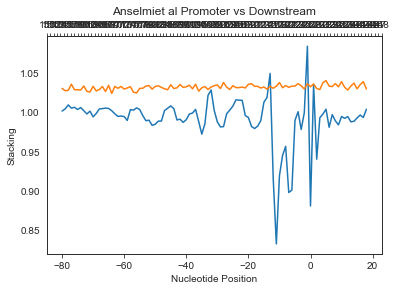

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)
plot = sns.lineplot(x='index', y=0, data=downstream_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'])

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Anselmiet al Promoter vs Downstream')

# show the plot
plt.show()


### Preparing Training Data

In [21]:
data= pd.concat([promoter,downstream])

In [22]:
data.reset_index(drop=True, inplace=True)

In [23]:
data

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,0.790,0.854,0.703,0.703,1.230,1.124,1.792,0.984,0.790,0.703,...,1.792,1.124,1.230,0.780,1.792,0.790,0.703,0.780,1.230,1
1,0.615,0.703,0.854,0.703,0.790,1.792,0.790,0.854,0.790,1.230,...,0.790,0.703,0.703,1.323,1.124,1.230,0.703,0.854,0.703,1
2,0.780,0.703,0.703,1.230,0.790,1.323,0.780,1.230,0.780,0.703,...,0.790,1.323,0.703,0.615,0.854,0.615,0.703,0.854,0.790,1
3,0.703,0.703,1.323,1.124,1.792,1.124,1.792,0.790,0.703,0.703,...,0.703,0.615,1.323,0.780,0.703,0.615,0.703,0.854,0.790,1
4,1.230,1.323,0.780,0.703,0.615,0.703,0.854,0.615,0.703,0.854,...,0.790,0.703,0.854,0.615,0.703,0.780,1.792,1.124,1.792,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29333,0.854,0.703,0.790,1.792,0.780,0.790,0.984,1.323,0.703,0.790,...,1.230,0.780,1.323,0.703,0.790,1.792,0.984,0.984,0.790,0
29334,1.230,0.703,0.780,1.323,1.230,0.790,1.323,0.984,0.790,0.780,...,0.703,0.615,1.323,0.780,1.230,0.984,0.780,0.615,1.323,0
29335,0.703,0.703,0.703,0.703,0.790,0.984,1.792,1.124,1.323,0.615,...,0.615,0.780,1.230,1.323,0.790,0.780,1.323,0.703,0.790,0
29336,1.124,1.230,0.703,0.854,0.790,0.984,1.230,0.703,0.780,1.230,...,0.854,0.703,0.703,0.703,0.703,0.615,1.323,0.790,1.323,0


# Prediction using machine learning

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve,auc, RocCurveDisplay
from statistics import mean
import sklearn.metrics as metrics
from statistics import mean
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, matthews_corrcoef, confusion_matrix

In [25]:

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)





In [26]:
feature_list=list(X_train.columns)

In [27]:
#'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300

In [28]:
X.shape

(29338, 99)

## Model Training

In [29]:
kfold = KFold(n_splits=10, shuffle=True)
clf = svm.SVC(kernel='rbf')
fold_no = 1

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
mcc_list = []
specificity_list = []

for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

    inputs = np.concatenate((X_train, X_test), axis=0)
    targets = np.concatenate((y_train, y_test), axis=0)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)
    accuracy_list.append(accuracy_score(testY, y_pred))
    precision_list.append(precision_score(testY, y_pred))
    recall_list.append(recall_score(testY, y_pred))
    f1_score_list.append(f1_score(testY, y_pred))
    
    # Calculate MCC
    mcc = matthews_corrcoef(testY, y_pred)
    mcc_list.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)
    
    print("Fold {}: Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        fold_no, accuracy_list[-1], precision_list[-1], recall_list[-1], f1_score_list[-1], mcc_list[-1], specificity_list[-1]))
    
    fold_no += 1

Fold 1: Accuracy: 0.78186775732788, Precision: 0.7788911155644622, Recall: 0.7905084745762712, F1 Score: 0.784656796769852, MCC: 0.563750268004348, Specificity: 0.7731322823851954
Fold 2: Accuracy: 0.7736877982276755, Precision: 0.780774550484094, Recall: 0.7649051490514905, F1 Score: 0.7727583846680356, MCC: 0.5475298230723222, Specificity: 0.7825788751714677
Fold 3: Accuracy: 0.7828902522154055, Precision: 0.7910034602076125, Recall: 0.7733423545331529, F1 Score: 0.7820732124529594, MCC: 0.5659725090441402, Specificity: 0.7925824175824175
Fold 4: Accuracy: 0.7740286298568507, Precision: 0.7513661202185792, Recall: 0.7862759113652609, F1 Score: 0.7684247293049249, MCC: 0.5485532442751491, Specificity: 0.7628664495114007
Fold 5: Accuracy: 0.7753919563735515, Precision: 0.7678207739307535, Recall: 0.7810773480662984, F1 Score: 0.7743923313933584, MCC: 0.5508876977615835, Specificity: 0.7698519515477793
Fold 6: Accuracy: 0.7788002726653034, Precision: 0.7875507442489851, Recall: 0.776517

In [30]:
accuracy_list

[0.78186775732788,
 0.7736877982276755,
 0.7828902522154055,
 0.7740286298568507,
 0.7753919563735515,
 0.7788002726653034,
 0.7835719154737559,
 0.7733469665985003,
 0.7684964200477327,
 0.7845209682918514]

In [31]:
precision_list

[0.7788911155644622,
 0.780774550484094,
 0.7910034602076125,
 0.7513661202185792,
 0.7678207739307535,
 0.7875507442489851,
 0.7902051621442753,
 0.7611036339165546,
 0.7649800266311585,
 0.7840599455040872]

In [32]:
recall_list

[0.7905084745762712,
 0.7649051490514905,
 0.7733423545331529,
 0.7862759113652609,
 0.7810773480662984,
 0.7765176784523016,
 0.7896825396825397,
 0.7848716169326856,
 0.7789830508474577,
 0.7851296043656207]

In [33]:
specificity_list

[0.7731322823851954,
 0.7825788751714677,
 0.7925824175824175,
 0.7628664495114007,
 0.7698519515477793,
 0.7811846689895471,
 0.7770745428973277,
 0.7622237106496986,
 0.7578875171467764,
 0.7839127471029311]

In [34]:
f1_score_list 

[0.784656796769852,
 0.7727583846680356,
 0.7820732124529594,
 0.7684247293049249,
 0.7743923313933584,
 0.7819952972791402,
 0.7899437644723785,
 0.7728049197130168,
 0.7719180382935842,
 0.7845944103612814]

In [35]:
mcc_list

[0.563750268004348,
 0.5475298230723222,
 0.5659725090441402,
 0.5485532442751491,
 0.5508876977615835,
 0.557585324776777,
 0.5667453527396343,
 0.5470552803887212,
 0.5370189176271177,
 0.5690426160630498]

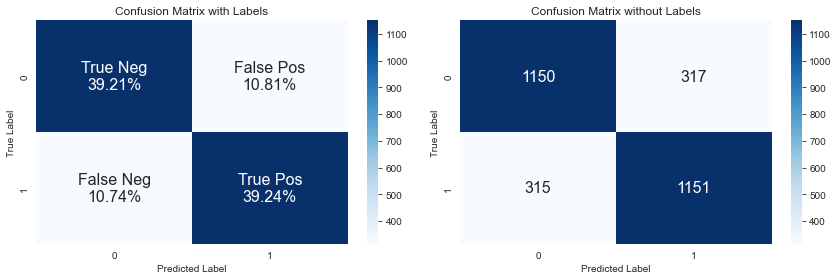

In [36]:
train_cm= confusion_matrix(testY, y_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
train_cm_array = train_cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in train_cm_array / np.sum(train_cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(train_cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [37]:
print(mean(accuracy_list))

0.7776602937078507


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


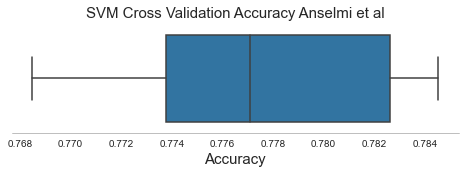

In [38]:
# Create a new figure with a larger size
plt.figure(figsize=(8,2))

# Create the boxplot with a custom title and color
ax = sns.boxplot(np.array(accuracy_list))
#sns.set(style='white')
#sns.set_palette('default')
plt.title('SVM Cross Validation Accuracy Anselmi et al', fontsize=15)  # Set font size of title
plt.xlabel('Accuracy', fontsize=15)  # Set font size of x-label

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove left and bottom ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Remove left and bottom spines and set their color to gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0.5)

# Display the plot
plt.show()


In [39]:
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print("Precision:",metrics.precision_score(testY, y_pred))
print("Recall:",metrics.recall_score(testY, y_pred))
print("f1_score:",metrics.f1_score(testY, y_pred))

Accuracy: 0.7845209682918514
Precision: 0.7840599455040872
Recall: 0.7851296043656207
f1_score: 0.7845944103612814


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


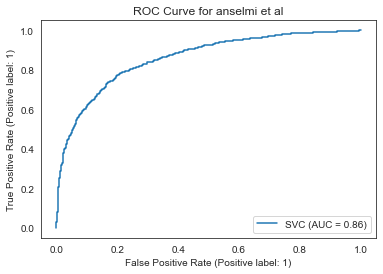

In [40]:
roc_curve= metrics.plot_roc_curve(clf, testX, testY)
roc_curve.ax_.set_title("ROC Curve for anselmi et al")
plt.show()

C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


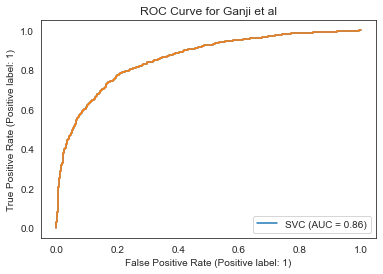

In [41]:
import pandas as pd

# Assuming roc_curve is the object returned by metrics.plot_roc_curve
roc_curve = metrics.plot_roc_curve(clf, testX, testY)

# Extract the data points from roc_curve
fpr = roc_curve.fpr
tpr = roc_curve.tpr

# Create a DataFrame
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

roc_df.to_csv('d:/ROC Curve data/downstream_anselmi_svm_roc_df.csv', index=False)

# Plot the ROC curve from the DataFrame
plt.plot(roc_df['False Positive Rate'], roc_df['True Positive Rate'])
plt.title("ROC Curve for Ganji et al")
plt.show()


# Using Shapley

In [65]:
!pip install shap

In [66]:
import shap


In [67]:
promoter.shape

(14669, 100)

### X_PCA promotor

In [68]:
import random

# set the random seed to ensure reproducibility
#random.seed(123)

# generate 40 random numbers between 1 to 15000
random_numbers = [random.randint(1, 10000) for _ in range(40)]

# print the random numbers
print(random_numbers)


[8081, 2132, 8982, 4223, 9217, 7124, 339, 9222, 9621, 4958, 2580, 3559, 6928, 7030, 6772, 9517, 156, 3509, 5088, 5143, 7997, 6396, 2568, 1593, 9692, 5680, 3230, 4048, 2484, 9609, 1561, 8603, 9344, 2240, 4419, 2961, 8854, 1297, 6368, 1698]


In [69]:
X_PCA_promoters = X.loc[[8499, 6345, 8807, 5017, 2395, 4771, 6378, 6038, 2073, 8765, 
                         5534, 8473, 1959, 2733, 9656, 6329, 7081, 1017, 2229, 7451, 338, 5727, 7369, 7392, 4978, 7029, 463, 2599, 8546, 
                         5323, 8468, 8434, 9119, 2251, 5630, 8195, 1717, 8937, 6046, 3685]]

In [70]:
X_PCA_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
8499,-2.17,-2.18,-1.76,-1.44,-2.81,-1.44,-1.46,-2.99,-1.46,-2.18,...,-2.99,-1.42,-2.99,-1.76,-1.42,-1.76,-2.18,-2.81,-1.42,-2.99
6345,-2.81,-1.44,-2.81,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-2.18,...,-1.44,-1.95,-1.46,-2.18,-1.46,-2.81,-1.44,-1.76,-2.18,-1.46
8807,-1.44,-1.76,-2.99,-1.42,-2.99,-1.46,-1.44,-1.76,-2.18,-1.46,...,-1.95,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-1.95,-1.95,-2.18
5017,-2.81,-1.44,-2.17,-1.44,-2.81,-1.95,-1.95,-1.44,-2.81,-1.52,...,-2.81,-1.76,-1.42,-2.18,-2.81,-1.76,-1.42,-2.81,-1.95,-2.18
2395,-1.44,-1.46,-2.18,-1.46,-2.81,-2.18,-1.44,-1.46,-1.76,-1.76,...,-2.17,-1.95,-1.52,-2.17,-1.95,-2.18,-1.46,-1.95,-1.95,-1.95
4771,-1.46,-2.81,-1.44,-2.18,-2.81,-1.46,-1.95,-1.44,-1.76,-2.99,...,-2.18,-1.76,-1.76,-1.44,-2.81,-1.42,-2.18,-2.17,-1.44,-2.99
6378,-2.18,-1.46,-1.76,-2.99,-1.44,-2.81,-1.44,-1.95,-2.17,-1.52,...,-1.76,-2.99,-1.44,-1.95,-2.81,-1.46,-1.52,-1.95,-2.17,-1.44
6038,-1.46,-1.52,-2.17,-2.18,-1.46,-1.52,-2.81,-1.46,-1.52,-2.17,...,-1.52,-2.17,-1.95,-2.18,-1.46,-2.18,-1.42,-2.18,-2.17,-1.52
2073,-1.42,-2.81,-1.52,-1.46,-2.99,-1.44,-1.46,-2.99,-1.44,-2.81,...,-2.17,-2.18,-1.44,-1.95,-2.17,-1.95,-1.95,-1.52,-2.17,-2.18
8765,-1.44,-1.95,-2.17,-1.52,-2.81,-1.76,-1.44,-2.17,-2.18,-1.76,...,-2.17,-1.44,-2.99,-1.76,-1.46,-1.95,-2.18,-1.46,-1.52,-2.17


In [71]:
explainer = shap.KernelExplainer(clf.predict, X_PCA_promoters)
shap_values = explainer.shap_values(X_PCA_promoters)

  0%|          | 0/40 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [72]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

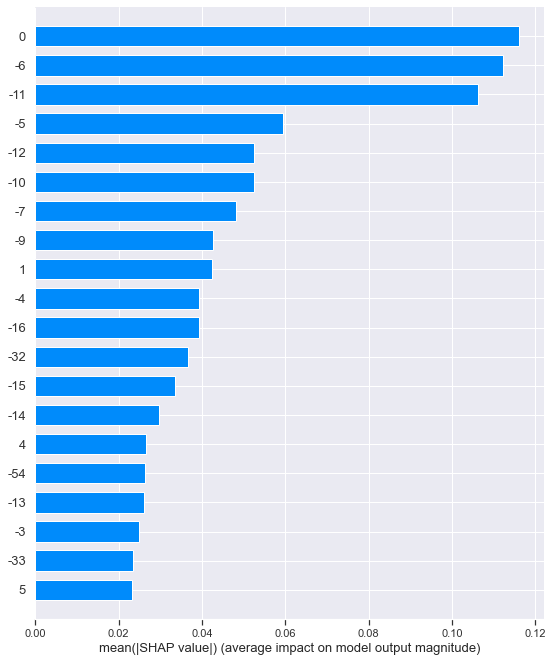

In [73]:
shap.summary_plot(shap_values,X_PCA_promoters, plot_type="bar", feature_names = X_PCA_promoters.columns)

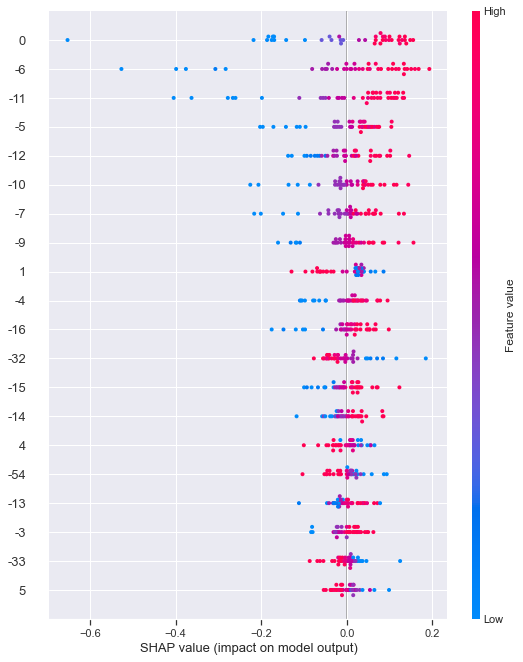

In [74]:
shap.summary_plot(shap_values, X_PCA_promoters, feature_names = X_PCA_promoters.columns)

AttributeError: 'int' object has no attribute 'split'

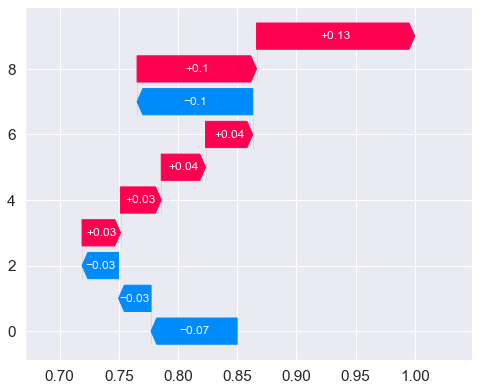

In [75]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_PCA_promoters.columns)

In [76]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, feature_names = X_PCA_promoters.columns)

In [77]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_PCA_promoters.columns)

# Test Organism Predictions

## Test Data

In [42]:
# Load the Test organisms dataset into a DataFrame
klebsiella = pd.read_csv(r"D:\ten organism\anselmi\test organism\stability_Sequences_80-20_sequences Klebsiella pneumoniae_output.csv")
salmonella= pd.read_csv(r"D:\ten organism\anselmi\test organism\stability_Sequences_80-20_sequences Salmonella enterica_output.csv")
klebsiella_downstream= pd.read_csv(r"D:\downstream control\anselmi\result\test organism\stability_Klebsiella pneumoniae_output.csv")
salmonella_downstream= pd.read_csv(r"D:\downstream control\anselmi\result\test organism\stability_Salmonella enterica_output.csv")

# Remove any irrelevant columns
test_organism = pd.concat([klebsiella,salmonella])
test_organism.columns=new_columns
test_organism.reset_index(drop=True, inplace=True)

test_organism_downstream= pd.concat([klebsiella_downstream,salmonella_downstream])
test_organism_downstream.columns=new_columns
test_organism_downstream.reset_index(drop=True, inplace=True)

test_without_labels= pd.concat([test_organism, test_organism_downstream])


In [43]:
test_line= pd.DataFrame(test_organism.mean())
test_line.reset_index(drop=False, inplace=True)
downstream_test_line=pd.DataFrame(test_organism_downstream.mean())
downstream_test_line.reset_index(drop= False, inplace=True)



[Text(0.5, 0, 'Nucleotide Position'),
 Text(0, 0.5, 'Stacking'),
 Text(0.5, 1.0, 'Anselmi Test Organism')]

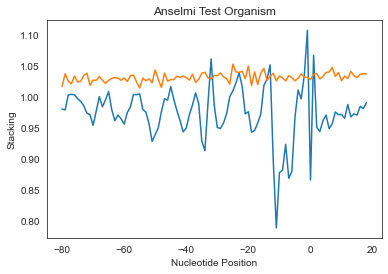

In [44]:
test_plot=sns.lineplot(x='index',y=0,data=test_line)
test_plot=sns.lineplot(x='index',y=0, data= downstream_test_line)

test_plot.set(xlabel ="Nucleotide Position", ylabel = "Stacking", title ='Anselmi Test Organism')

## Test Labels

In [45]:
test_organism_lables= np.ones(test_organism.shape[0], dtype=int)
test_downstream_labels= np.zeros(test_organism_downstream.shape[0], dtype=int)

test_labels = np.concatenate((test_organism_lables, test_downstream_labels))

In [46]:
test_without_labels.shape

(4620, 99)

## Test Prediction in One Go

In [47]:
# Create an array of ones with the same number of rows as the new dataset
#true_labels = np.ones(test_organism.shape[0], dtype=int)

# Make predictions on the new data
test_organism_pred = clf.predict(test_without_labels)

# Calculate the accuracy of the model on the new data
accuracy = metrics.accuracy_score(test_labels, test_organism_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8153679653679654


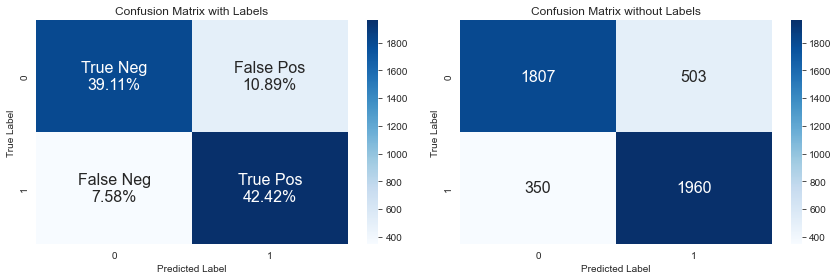

In [48]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(test_labels, test_organism_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
cm_array = cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in cm_array / np.sum(cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Test Prediction in 10 splits

In [49]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [50]:
# Convert DataFrame to numpy array
if isinstance(test_without_labels, pd.DataFrame):
    test_without_labels = test_without_labels.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_mcc = []
test_specificity = []
all_cms = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(test_without_labels, test_labels)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = test_without_labels[test_index]
    y_test = test_labels[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1_score.append(f1)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    all_cms.append(cm)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    test_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    test_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        test_accuracy[-1], test_precision[-1], test_recall[-1], test_f1_score[-1], test_mcc[-1], test_specificity[-1]))

Fold 1/10
 Accuracy: 0.8441558441558441, Precision: 0.8382978723404255, Recall: 0.8528138528138528, F1 Score: 0.8454935622317596, MCC: 0.6884149047456879, Specificity: 0.8354978354978355
Fold 2/10
 Accuracy: 0.8073593073593074, Precision: 0.7730769230769231, Recall: 0.8701298701298701, F1 Score: 0.8187372708757638, MCC: 0.6196207964995073, Specificity: 0.7445887445887446
Fold 3/10
 Accuracy: 0.7965367965367965, Precision: 0.7818930041152263, Recall: 0.8225108225108225, F1 Score: 0.8016877637130801, MCC: 0.5938754505877736, Specificity: 0.7705627705627706
Fold 4/10
 Accuracy: 0.816017316017316, Precision: 0.7943548387096774, Recall: 0.8528138528138528, F1 Score: 0.8225469728601251, MCC: 0.6337531466980288, Specificity: 0.7792207792207793
Fold 5/10
 Accuracy: 0.8203463203463204, Precision: 0.7983870967741935, Recall: 0.8571428571428571, F1 Score: 0.8267223382045928, MCC: 0.6424346966527964, Specificity: 0.7835497835497836
Fold 6/10
 Accuracy: 0.8376623376623377, Precision: 0.819672131147

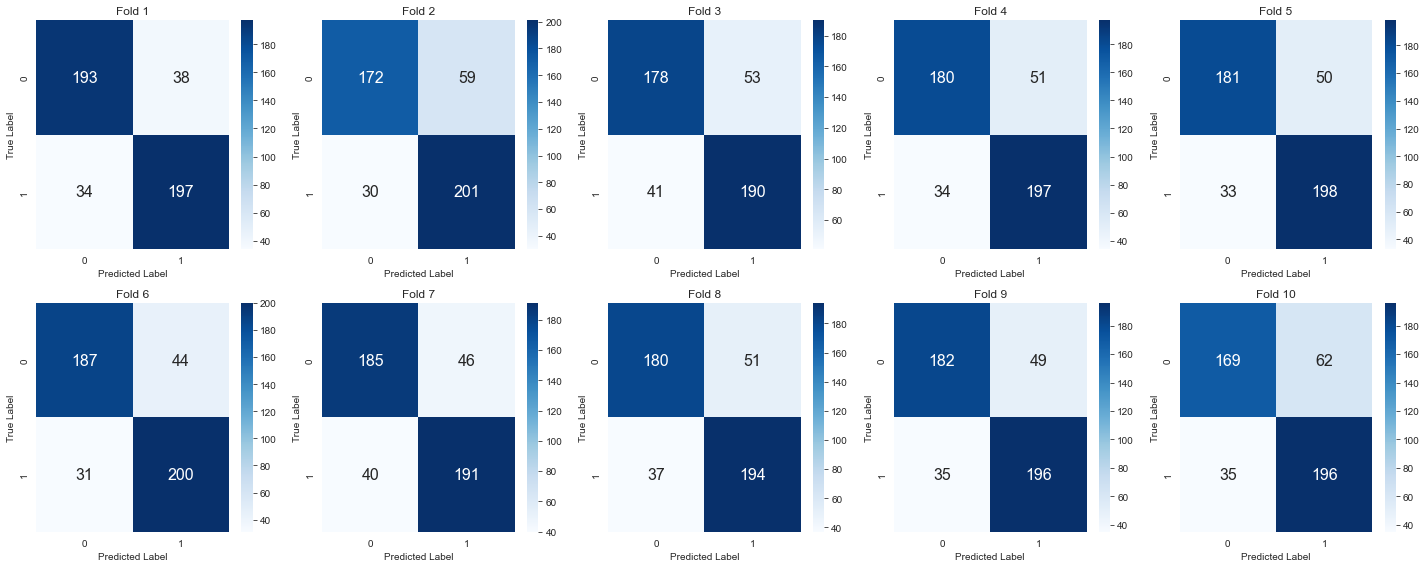

In [51]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flatten()):
    if i < len(all_cms):
        cm = all_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [52]:
test_accuracy

[0.8441558441558441,
 0.8073593073593074,
 0.7965367965367965,
 0.816017316017316,
 0.8203463203463204,
 0.8376623376623377,
 0.8138528138528138,
 0.8095238095238095,
 0.8181818181818182,
 0.79004329004329]

In [53]:
test_precision

[0.8382978723404255,
 0.7730769230769231,
 0.7818930041152263,
 0.7943548387096774,
 0.7983870967741935,
 0.819672131147541,
 0.8059071729957806,
 0.7918367346938775,
 0.8,
 0.7596899224806202]

- Precision equal to 1.0 means that all the positive predictions made by the classifier are correct. 
- In other words, the classifier didn't make any false positive predictions. 

In [54]:
test_recall

[0.8528138528138528,
 0.8701298701298701,
 0.8225108225108225,
 0.8528138528138528,
 0.8571428571428571,
 0.8658008658008658,
 0.8268398268398268,
 0.8398268398268398,
 0.8484848484848485,
 0.8484848484848485]

In [55]:
test_specificity

[0.8354978354978355,
 0.7445887445887446,
 0.7705627705627706,
 0.7792207792207793,
 0.7835497835497836,
 0.8095238095238095,
 0.8008658008658008,
 0.7792207792207793,
 0.7878787878787878,
 0.7316017316017316]

In [56]:
test_f1_score

[0.8454935622317596,
 0.8187372708757638,
 0.8016877637130801,
 0.8225469728601251,
 0.8267223382045928,
 0.8421052631578948,
 0.8162393162393163,
 0.8151260504201681,
 0.823529411764706,
 0.8016359918200409]

In [57]:
test_mcc

[0.6884149047456879,
 0.6196207964995073,
 0.5938754505877736,
 0.6337531466980288,
 0.6424346966527964,
 0.6763966350307224,
 0.6279174757129099,
 0.6201876708771787,
 0.6375355777548621,
 0.5840901220786346]

## Antisense Promoters with Downstream

###### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- Helicobactor pylori
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Salmonella enterica
- Streptomyces coelicolor
- Synechocystis sp

In [58]:
antisense= pd.read_csv(r"D:\Other promoters\Downstream sequences\Antisense\Antisense promoter vs downstream\Antisense anselmi promoter vs downstream.csv")
antisense

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,0.615,0.780,0.984,1.230,0.854,0.703,1.230,0.780,0.703,0.703,...,0.984,0.790,0.703,0.703,0.703,0.780,1.230,0.703,0.780,1
1,1.230,0.703,0.780,1.792,1.124,1.230,0.854,0.615,0.703,0.780,...,0.703,0.780,1.792,0.790,0.854,1.230,0.984,0.790,0.703,1
2,0.703,1.230,0.790,0.854,0.790,1.230,0.854,0.615,0.854,0.615,...,0.780,1.792,0.780,1.230,1.124,1.323,0.615,0.703,0.703,1
3,1.230,0.780,0.615,0.780,1.230,0.703,0.780,1.792,0.780,0.790,...,0.790,0.984,1.230,0.780,1.230,0.703,0.703,0.854,0.790,1
4,0.780,0.984,1.323,0.615,0.703,0.703,0.854,0.615,1.323,0.984,...,0.790,0.780,0.984,1.792,0.984,0.984,0.780,1.230,0.780,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,1.124,1.323,0.703,0.703,1.230,0.984,0.984,0.984,0.780,0.703,...,0.703,1.230,0.790,0.854,1.230,1.124,1.323,1.230,0.984,0
12164,0.703,1.230,0.780,0.703,1.230,1.124,0.984,1.323,0.790,1.792,...,1.323,0.984,1.124,0.984,1.230,0.780,1.792,1.124,1.230,0
12165,0.780,0.790,1.230,0.854,0.790,0.984,0.984,0.984,1.230,0.780,...,1.323,0.780,0.615,0.703,1.323,0.790,0.780,1.792,0.984,0
12166,0.703,0.780,1.230,0.854,0.703,0.790,1.792,1.124,0.984,0.984,...,0.984,0.984,1.230,1.323,0.780,0.703,0.703,0.615,0.780,0


In [59]:
antisense_promoter= antisense.drop(columns=['label'])
antisense_label= antisense['label']

In [61]:
# Convert DataFrame to numpy array
if isinstance(antisense_promoter, pd.DataFrame):
    antisense_promoter = antisense_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

antisense_accuracy = []
antisense_precision=[]
antisense_recall=[]
antisense_f1_score=[]
antisense_cms = []
antisense_mcc = []
antisense_specificity = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(antisense_promoter, antisense_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = antisense_promoter[test_index]
    y_test = antisense_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    antisense_accuracy.append(accuracy)
    antisense_precision.append(precision)
    antisense_recall.append(recall)
    antisense_f1_score.append(f1)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    antisense_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    antisense_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    antisense_accuracy[-1], antisense_precision[-1], antisense_recall[-1], antisense_f1_score[-1],
    antisense_mcc[-1], antisense_specificity[-1]))

    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    antisense_cms.append(cm)


Fold 1/10
 Accuracy: 0.7066557107641742, Precision: 0.7032258064516129, Recall: 0.715927750410509, F1 Score: 0.7095199349064281, MCC: 0.41336986011016064, Specificity: 0.6875
Fold 2/10
 Accuracy: 0.6959737058340181, Precision: 0.6780923994038748, Recall: 0.7471264367816092, F1 Score: 0.7109374999999999, MCC: 0.39394665986629157, Specificity: 0.6973684210526315
Fold 3/10
 Accuracy: 0.7181594083812654, Precision: 0.7111111111111111, Recall: 0.735632183908046, F1 Score: 0.7231638418079096, MCC: 0.436562520036435, Specificity: 0.6447368421052632
Fold 4/10
 Accuracy: 0.7288414133114215, Precision: 0.7136294027565084, Recall: 0.7651888341543513, F1 Score: 0.7385103011093502, MCC: 0.4588515251568049, Specificity: 0.7006578947368421
Fold 5/10
 Accuracy: 0.7263763352506163, Precision: 0.7145085803432137, Recall: 0.7532894736842105, F1 Score: 0.7333867093674941, MCC: 0.45344392592340205, Specificity: 0.6924342105263158
Fold 6/10
 Accuracy: 0.7082990961380444, Precision: 0.6863033873343152, Recal

In [62]:
antisense_accuracy

[0.7066557107641742,
 0.6959737058340181,
 0.7181594083812654,
 0.7288414133114215,
 0.7263763352506163,
 0.7082990961380444,
 0.7362366474938373,
 0.7132292522596549,
 0.7146381578947368,
 0.7171052631578947]

In [63]:
antisense_precision

[0.7032258064516129,
 0.6780923994038748,
 0.7111111111111111,
 0.7136294027565084,
 0.7145085803432137,
 0.6863033873343152,
 0.7238689547581904,
 0.6977099236641221,
 0.6998468606431854,
 0.7049689440993789]

In [64]:
antisense_recall

[0.715927750410509,
 0.7471264367816092,
 0.735632183908046,
 0.7651888341543513,
 0.7532894736842105,
 0.7664473684210527,
 0.7631578947368421,
 0.7516447368421053,
 0.7516447368421053,
 0.7467105263157895]

In [65]:
antisense_specificity

[0.6875,
 0.6973684210526315,
 0.6447368421052632,
 0.7006578947368421,
 0.6924342105263158,
 0.6995073891625616,
 0.6502463054187192,
 0.7093596059113301,
 0.6748768472906403,
 0.6776315789473685]

In [66]:
antisense_f1_score

[0.7095199349064281,
 0.7109374999999999,
 0.7231638418079096,
 0.7385103011093502,
 0.7333867093674941,
 0.7241647241647241,
 0.7429943955164132,
 0.7236737925574029,
 0.724821570182395,
 0.7252396166134185]

In [67]:
antisense_mcc

[0.41336986011016064,
 0.39394665986629157,
 0.436562520036435,
 0.4588515251568049,
 0.45344392592340205,
 0.4195186940973552,
 0.47319274522873006,
 0.42777228316102794,
 0.43045694514845645,
 0.4349736799457877]

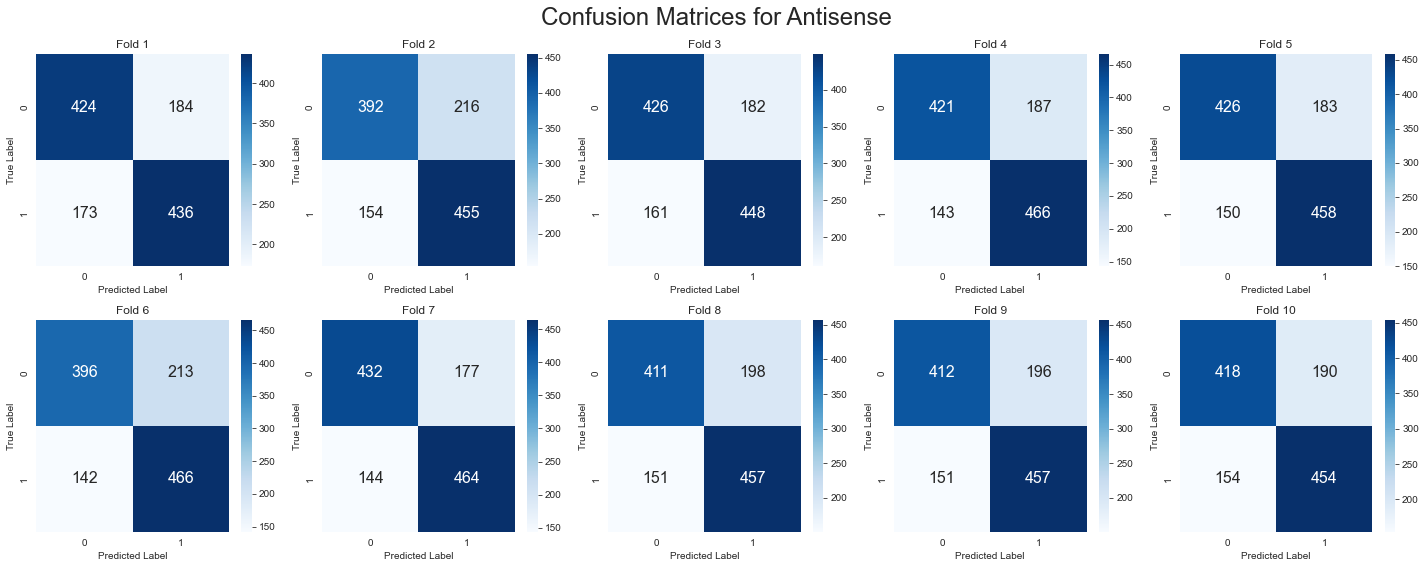

In [68]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Antisense", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(antisense_cms):
        cm = antisense_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


## Internal Promoter with downstream

#### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- E.coli
- Helicobactor pylori
- Klebsiella pneumoniae
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Streptomyces coelicolor

In [69]:
internal= pd.read_csv(r"D:\Other promoters\Downstream sequences\Induced\Induced promoter vs downstream\Induced anselmi promoter vs downstream.csv")
internal

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,0.780,1.230,1.124,1.323,0.615,1.323,1.124,0.984,0.984,1.230,...,0.703,0.780,1.230,0.703,0.703,0.703,0.854,1.230,0.790,1
1,0.854,1.230,0.790,0.703,0.703,0.854,0.703,0.703,0.615,1.323,...,0.790,0.780,1.792,0.780,0.703,0.615,0.854,0.790,1.792,1
2,0.984,0.984,1.792,0.984,0.790,0.854,0.790,1.792,0.790,0.780,...,0.780,1.792,0.790,0.703,0.854,0.703,0.790,1.792,0.780,1
3,1.323,0.790,0.703,1.323,0.780,0.790,1.230,0.854,0.703,0.615,...,0.703,0.703,1.323,1.124,1.230,0.703,0.703,0.854,1.230,1
4,0.780,1.230,0.780,0.703,0.703,0.615,0.703,0.703,0.854,1.230,...,1.323,0.790,0.703,0.780,1.230,0.703,0.703,0.703,0.854,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,0.984,1.792,0.984,0.984,0.790,1.323,1.124,0.984,1.792,1.124,...,0.790,0.703,1.323,0.780,1.230,0.984,0.984,1.124,0.984,0
12126,0.984,1.124,1.230,1.323,1.124,1.792,0.790,0.703,0.780,1.792,...,0.984,1.792,1.124,1.230,0.703,1.323,0.984,1.124,1.792,0
12127,0.703,0.780,1.230,0.703,0.780,1.230,1.323,0.984,1.124,1.230,...,0.790,1.323,1.124,1.792,0.984,0.790,1.323,0.984,0.790,0
12128,1.792,0.984,1.124,1.230,0.703,0.780,1.230,1.323,0.984,0.790,...,1.792,1.124,0.984,1.230,0.854,1.230,1.124,0.984,1.792,0


In [70]:
internal_promoter= internal.drop(columns=['label'])
internal_label= internal['label']

In [71]:
# Convert DataFrame to numpy array
if isinstance(internal_promoter, pd.DataFrame):
    internal_promoter = internal_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

internal_accuracy = []
internal_precision=[]
internal_recall=[]
internal_f1_score=[]
internal_cms = []
internal_mcc = []
internal_specificity = []


# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(internal_promoter, internal_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = internal_promoter[test_index]
    y_test = internal_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    internal_accuracy.append(accuracy)
    internal_precision.append(precision)
    internal_recall.append(recall)
    internal_f1_score.append(f1)
    internal_mcc.append(mcc)
    internal_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    internal_accuracy[-1], internal_precision[-1], internal_recall[-1], internal_f1_score[-1],
    internal_mcc[-1], internal_specificity[-1]))
    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    internal_cms.append(cm)


Fold 1/10
 Accuracy: 0.7131079967023908, Precision: 0.7221269296740995, Recall: 0.6935749588138386, F1 Score: 0.7075630252100841, MCC: 0.4265684100323919, Specificity: 0.6875
Fold 2/10
 Accuracy: 0.7048639736191261, Precision: 0.7142857142857143, Recall: 0.6836902800658978, F1 Score: 0.6986531986531986, MCC: 0.41012540626794164, Specificity: 0.7326732673267327
Fold 3/10
 Accuracy: 0.6924979389942292, Precision: 0.6963087248322147, Recall: 0.6836902800658978, F1 Score: 0.6899418121363259, MCC: 0.3850679920268171, Specificity: 0.7260726072607261
Fold 4/10
 Accuracy: 0.7098103874690849, Precision: 0.717206132879046, Recall: 0.6935749588138386, F1 Score: 0.7051926298157455, MCC: 0.41986449308963775, Specificity: 0.7013201320132013
Fold 5/10
 Accuracy: 0.6628194558944766, Precision: 0.6633663366336634, Recall: 0.6622734761120264, F1 Score: 0.6628194558944767, MCC: 0.3256398127456897, Specificity: 0.7260726072607261
Fold 6/10
 Accuracy: 0.7032151690024732, Precision: 0.7029702970297029, Reca

In [72]:
internal_accuracy

[0.7131079967023908,
 0.7048639736191261,
 0.6924979389942292,
 0.7098103874690849,
 0.6628194558944766,
 0.7032151690024732,
 0.7279472382522671,
 0.6908491343775762,
 0.6933223413025557,
 0.718878812860676]

In [73]:
internal_precision

[0.7221269296740995,
 0.7142857142857143,
 0.6963087248322147,
 0.717206132879046,
 0.6633663366336634,
 0.7029702970297029,
 0.7331081081081081,
 0.6896551724137931,
 0.6943521594684385,
 0.7272727272727273]

In [74]:
internal_recall

[0.6935749588138386,
 0.6836902800658978,
 0.6836902800658978,
 0.6935749588138386,
 0.6622734761120264,
 0.7029702970297029,
 0.7161716171617162,
 0.693069306930693,
 0.6897689768976898,
 0.6996699669966997]

In [75]:
internal_specificity

[0.6875,
 0.7326732673267327,
 0.7260726072607261,
 0.7013201320132013,
 0.7260726072607261,
 0.6633663366336634,
 0.7034596375617792,
 0.7397034596375618,
 0.6886326194398682,
 0.6968698517298187]

In [76]:
internal_f1_score

[0.7075630252100841,
 0.6986531986531986,
 0.6899418121363259,
 0.7051926298157455,
 0.6628194558944767,
 0.7029702970297029,
 0.724540901502504,
 0.691358024691358,
 0.6920529801324503,
 0.7132043734230445]

In [77]:
internal_mcc

[0.4265684100323919,
 0.41012540626794164,
 0.3850679920268171,
 0.41986449308963775,
 0.3256398127456897,
 0.4064299345914822,
 0.4560052614658594,
 0.3817050394457076,
 0.38664934005893414,
 0.43805478578598106]

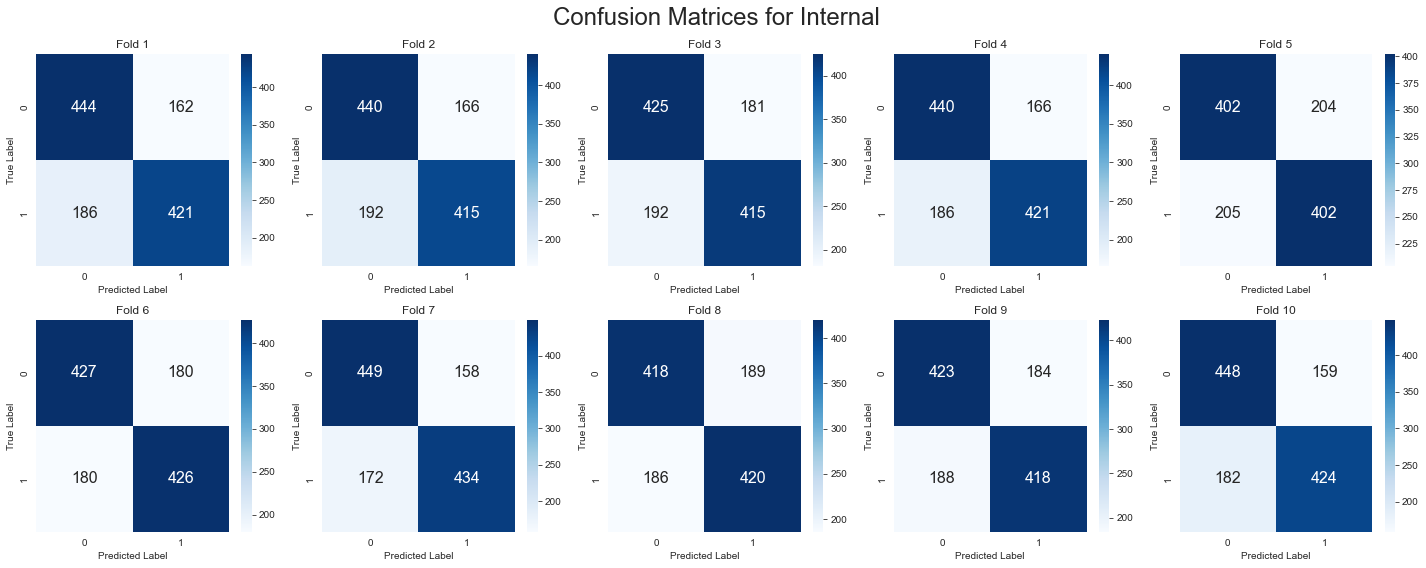

In [78]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Internal", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(internal_cms):
        cm = internal_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
